# Sorting Algorithms

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

Sorting algorithms are a set of instructions that take an array or list as an input and arrange the items into a particular order.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import shap
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from lime.lime_tabular import LimeTabularExplainer
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# 1. Bubble sort

Bubble Sort is the simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in the wrong order. This algorithm is not suitable for large data sets as its average and worst-case time complexity is quite high.

### Steps

**Step 0:** We see the list to sort.

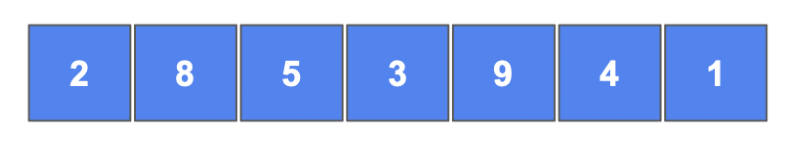

In [5]:
display_img('1.png', 10, 10)

**Step 1:** We start traversing the list.

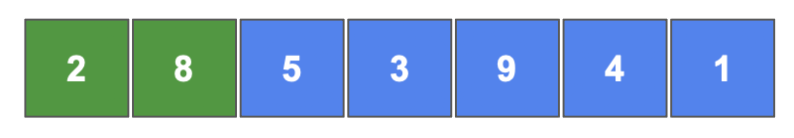

In [6]:
display_img('2.png', 10, 10)

**Step 2:** Everything is okey. We pass to the other two elements to review.

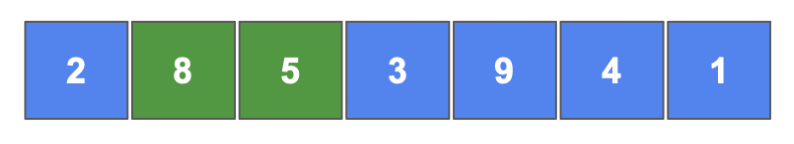

In [7]:
display_img('3.png', 10, 10)

**Step 3:** How $ 8 > 5 $ we have to swap elements.

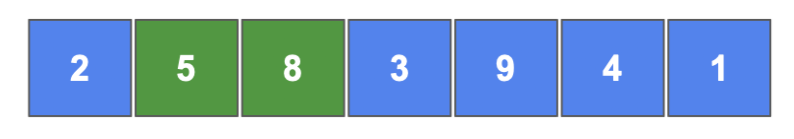

In [8]:
display_img('4.png', 10, 10)

**Step 4:** We pass to the other two elements.

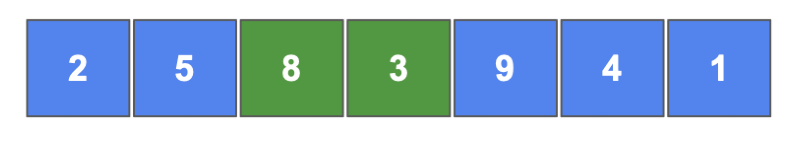

In [9]:
display_img('5.png', 10, 10)

**Step 5:** How $ 8 > 3 $ we have to swap elements.

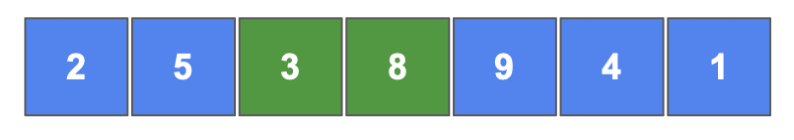

In [10]:
display_img('6.png', 10, 10)

**Step 6:** We pass to the other two elements.

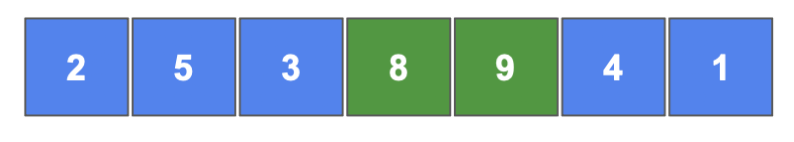

In [11]:
display_img('7.png', 10, 10)

**Step 7:** Everything is okey. We pass to the other two elements to review.

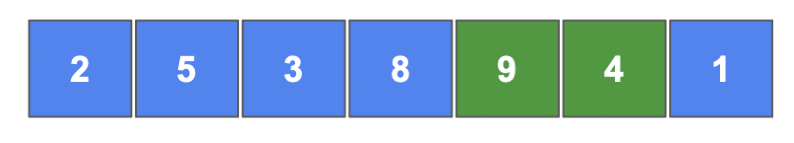

In [12]:
display_img('8.png', 10, 10)

**Step 8:** How $ 9 > 4 $ we have to swap elements.

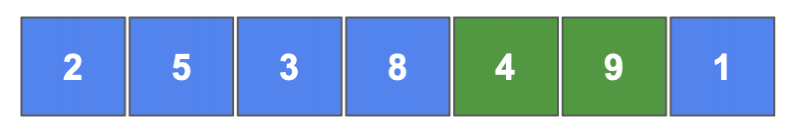

In [13]:
display_img('9.png', 10, 10)

**Step 9:** We pass to the other two elements.

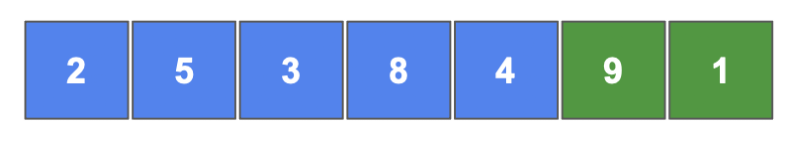

In [14]:
display_img('10.png', 10, 10)

**Step 10:** How $ 9 > 1 $ we have to swap elements.

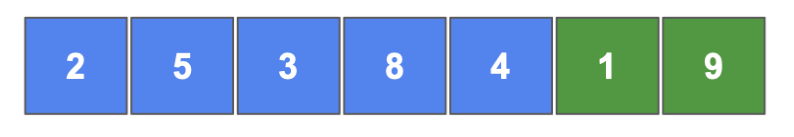

In [15]:
display_img('11.png', 10, 10)

**Step 11:** Finally we finish the first iteration with $ 9 $ in its correct position. We have to repeat this process $ (n - 1) $ times, because on the $ (n - 1() $ iteration we will finish with $ (n - 1) $ in its correct position and it implies that all the elements are in its correct position.

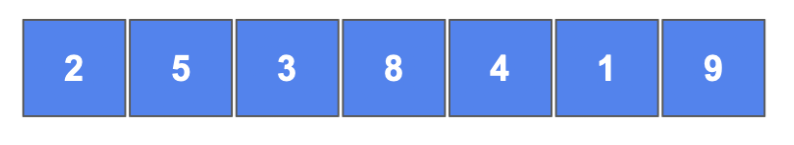

In [16]:
display_img('12.png', 10, 10)

In [17]:
def bubble_sort(list_to_sort):

    N = len(list_to_sort)

    for k in range(N - 1):

        for i in range(N - 1):

            if list_to_sort[i] > list_to_sort[i+1]:
                
                list_to_sort[i], list_to_sort[i+1] = list_to_sort[i+1], list_to_sort[i]
    
    return list_to_sort

In [18]:
list_to_sort = [2, 8, 5, 3, 9, 4, 1]

In [19]:
bubble_list = bubble_sort(list_to_sort)

In [20]:
bubble_list

[1, 2, 3, 4, 5, 8, 9]

### Computational Complexity: Bubble Sort

Assume the cost of swap two elements is $ c $ then:

$ T(n) = \sum_{k = 1}^{n - 1} \sum_{i = 1}^{n - 1} c = c \cdot \sum_{k = 1}^{n - 1} \sum_{i = 1}^{n - 1} 1 = c \cdot \sum_{k = 1}^{n - 1} \left( \sum_{i = 1}^{n - 1} 1 \right) = c \cdot \sum_{k = 1}^{n - 1} \left( n - 1 \right) = c \cdot \left( n - 1 \right) \cdot \sum_{k = 1}^{n - 1} 1 = c \cdot (n - 1) \cdot (n - 1) = c \cdot (n - 1)^2  $

$ \Rightarrow $

$ T(n) = c \cdot (n - 1)^2 $

$ \Rightarrow $

$ T(n) \in O(n^2) $

# 2. Quick sort

### Steps

**Step 0:** We see the list to sort. The last element going to be our pivot.

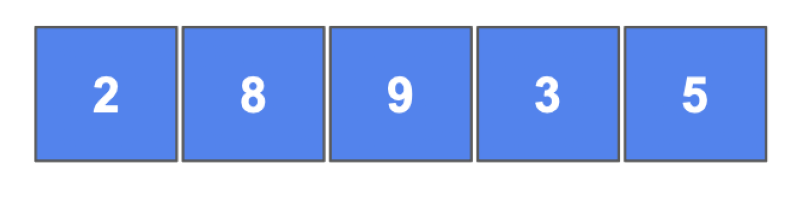

In [21]:
display_img('0_B.png', 10, 10)

**Step 1:** We start traversing the list. The $ i $ is the red square and the $ j $ is the green square.

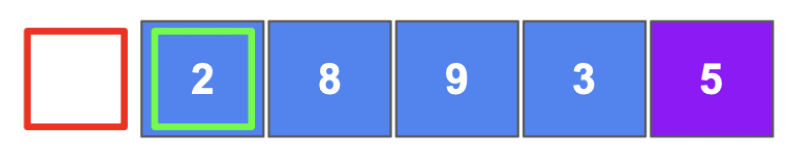

In [22]:
display_img('1_B.png', 10, 10)

**Step 2:** How $ 2 < 5 $, we move forward $ i $.

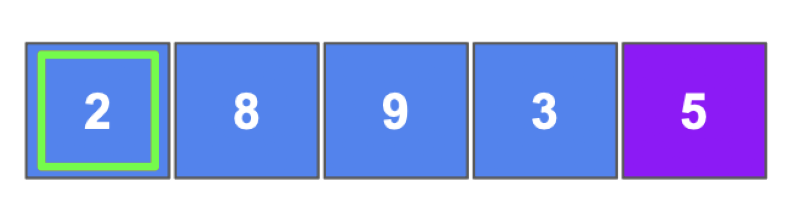

In [23]:
display_img('2_B.png', 10, 10)

**Step 3:** In a normal situation we have to swap the $i$ and $j$ values, but how both are on the same place, we don't swap. Now we move forward $j$.

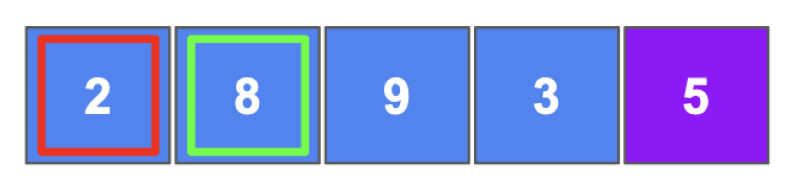

In [24]:
display_img('3_B.png', 10, 10)

**Step 4:** How $ 8 > 5 $ we only move forward $j$.

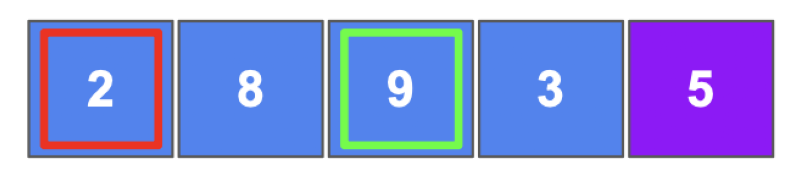

In [25]:
display_img('4_B.png', 10, 10)

**Step 5:** How $ 9 > 5 $ we only move forward $j$.

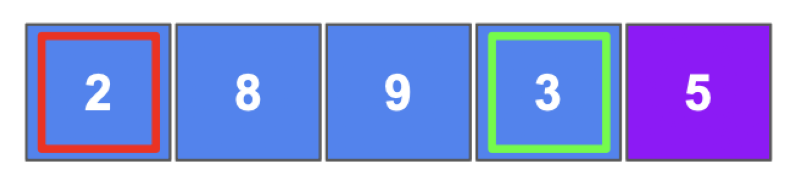

In [26]:
display_img('5_B.png', 10, 10)

**Step 6:** How $ 3 < 5 $ we move forward $i$.

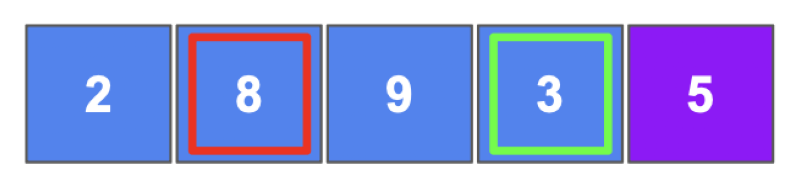

In [27]:
display_img('6_B.png', 10, 10)

**Step 7:** Now we swap $ i $ and $ j $ values.

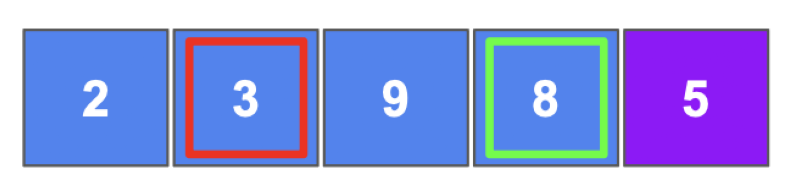

In [28]:
display_img('7_B.png', 10, 10)

**Step 8:** Now we move forward $j$, and how now $ j $ is on the pivot we finish the iteration and we have to put on the correct position the pivot.

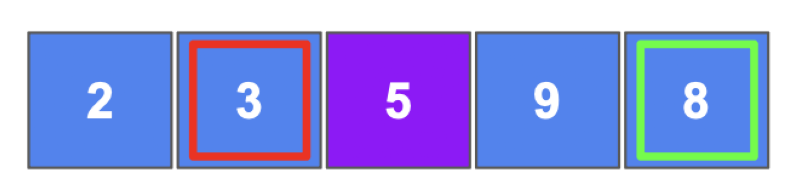

In [29]:
display_img('9_B.png', 10, 10)

**Step 9:** Now we have to return the first part of the list sorted with quicksort + the pivot + the second part of the list sorted with quicksort.

In [30]:
def quick_sort(list_to_sort_ori):

    list_to_sort = list_to_sort_ori.copy()

    N = len(list_to_sort)

    if N <= 1:

        return list_to_sort

    else:

        pivot = list_to_sort[N - 1]

        i = -1
        j = 0

        while j <= N - 1:

            if list_to_sort[j] < pivot:

                i = i + 1

                list_to_sort[i], list_to_sort[j] = list_to_sort[j], list_to_sort[i]

                j = j + 1
            
            else:

                j = j + 1

    return quick_sort(list_to_sort[0: i + 1]) + [pivot] + quick_sort(list_to_sort[i + 1: - 1])

In [31]:
list_to_sort_ori = [2, 8, 9, 3, 5]

In [32]:
quick_list = quick_sort(list_to_sort_ori)

In [33]:
quick_list

[2, 3, 5, 8, 9]

### Computational Complexity: Quick Sort

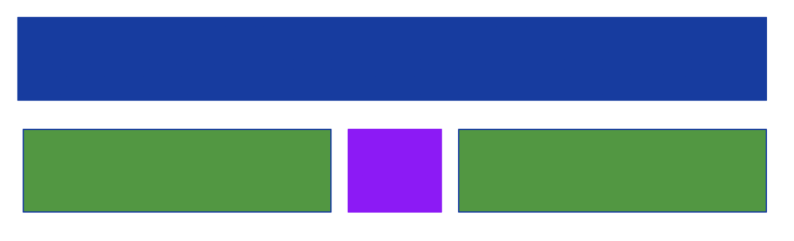

In [34]:
display_img('complexity.png', 10, 10)

Asumme the list have $ n $ elements and the cost of swap elements is $ c $ then we have:

$ T(n) = n \cdot c + 2 \cdot T \left( \frac{n}{2} \right) $

We replacing with $ n = 2^k $, then:

$ T(2^k) = 2^k \cdot c + 2 \cdot T \left( \frac{2^k}{2} \right) $

$ \Rightarrow $ 

$ T(2^k) = 2^k \cdot c + 2 \cdot T(2^{k-1}) $

We create the succession $ a_k = T(2^k) $, then:

$ a_k = 2^k \cdot c + 2 \cdot a_{k-1} $

We want to deduce a formula for $ a_k $:

$ a_m = 2^m \cdot c + 2 \cdot a_{m-1} = 2^m \cdot c + 2 \cdot [2^{m-1} \cdot c + 2 \cdot a_{m-2}] = 2 \cdot 2^m \cdot c + 2^2 \cdot a_{m-2} $

$ \Rightarrow $

$ a_k = k \cdot c \cdot 2^k + 2^k \cdot a_0 $

$ \Rightarrow $

$ T(2^k) = k \cdot c \cdot 2^k + 2^k \cdot T(1) $

How $ T(1) = c $, then:

$ T(2^k) = k \cdot c \cdot 2^k + 2^k \cdot c $

Replacing $ (n = 2^k) $:

$ T(n) = \cfrac{ln(n)}{ln(2)} \cdot c \cdot n + n \cdot c $

**Notation**

$ 1 \leq ln(n) \ \ \ \forall n \geq 3 $

$ \Rightarrow $

$ n \cdot c \leq n \cdot ln(n) \cdot c $

$ \Rightarrow $

$ \cfrac{ln(n)}{ln(2)} \cdot c \cdot n + n \cdot c \leq \cfrac{ln(n)}{ln(2)} \cdot c \cdot n + n \cdot ln(n) \cdot c $

$ \Rightarrow $

$ T(n) \leq \cfrac{ln(n)}{ln(2)} \cdot c \cdot n + n \cdot ln(n) \cdot c = \left[ c \cdot \left( \cfrac{1}{ln(2)} + 1 \right) \right] \cdot n \cdot ln(n) $

$ \Rightarrow $

$ T(n) \in O(n \cdot ln(n)) $

### Time of execution

In [35]:
end = time.time()

In [36]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
